In [1187]:
import pandas as pd
import numpy as np

In [1188]:
models_test_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/t3_AllFeaturesInd/models_test_gini.csv', index_col=None)
models_train_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/t3_AllFeaturesInd/models_train_gini.csv', index_col=None)

In [1211]:
models_test_gini_df[~models_test_gini_df['Model'].str.contains('_0')]

,Model,S0.45,S0.4,S0.35,S0.3,S0.25,S0.2,S0.15,S0.1,Mean,t-pvalue,t-statistic,Group
0,BaseModel,0.221477,0.215657,0.216327,0.211724,0.211135,0.213257,0.214288,0.210966,0.214354,1.000000e+00,0.000000,1
1,accidentpreventioncourseind,0.290863,0.293979,0.295613,0.294827,0.292289,0.301710,0.287023,0.298916,0.294402,1.023541e-15,-39.213421,2
6,antitheftcd,0.219966,0.217665,0.220663,0.212995,0.209481,0.215200,0.208192,0.209642,0.214226,9.528719e-01,0.060168,1
11,carpoolind,0.281722,0.280983,0.283936,0.278495,0.278389,0.279549,0.266393,0.270738,0.277526,3.128461e-13,-25.915738,2
16,classcd,0.296837,0.299968,0.297034,0.297343,0.313666,0.310624,0.304311,0.307723,0.303438,8.990132e-15,-33.523946,2
21,daylightrunninglightsind,0.233511,0.230385,0.231182,0.224931,0.221737,0.226246,0.219823,0.219044,0.225857,1.889041e-04,-5.015793,2
26,driverstatuscd,0.226020,0.223776,0.225760,0.221329,0.218010,0.227059,0.225803,0.227421,0.224397,3.552319e-05,-5.949225,2
31,drivertrainingind,0.287984,0.291845,0.291790,0.291048,0.289669,0.296682,0.289269,0.296281,0.291821,9.952995e-17,-46.371943,2
36,enginecylinders,0.275123,0.269234,0.271726,0.267336,0.270013,0.270450,0.265951,0.268341,0.269772,5.393465e-15,-34.784304,2
41,gendercd,0.221465,0.219127,0.218617,0.213898,0.214589,0.217731,0.214683,0.211468,0.216447,2.399225e-01,-1.227370,1


In [1191]:
import matplotlib.pyplot as plt
%matplotlib inline

Overfitting control: 1st and last row

In [1192]:
row_num1=0
#row_num2=len(models_test_gini_df)-1
row_num2=1
#1.Building dataset with metrics at different Test/Train sizes
df_test1=models_test_gini_df[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[row_num1]].transpose()
df_test1.columns=['TestGini1']
df_train1=models_train_gini_df[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[row_num1]].transpose()
df_train1.columns=['TrainGini1']
df1=df_test1.join(df_train1)
df1.reset_index(inplace=True)
df1.columns=['Size','TestGini1','TrainGini1']
df1['Size']=df1.apply(lambda c: c.Size.replace('S', ''), axis=1)
df1['Size']=df1['Size'].apply(pd.to_numeric)
df1['Diff1']=df1['TrainGini1'] - df1['TestGini1']
#
df_test2=models_test_gini_df[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[row_num2]].transpose()
df_test2.columns=['TestGini2']
df_train2=models_train_gini_df[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[row_num2]].transpose()
df_train2.columns=['TrainGini2']
df2=df_test2.join(df_train2)
df2.reset_index(inplace=True)
df2.columns=['Size','TestGini2','TrainGini2']
df2['Size']=df2.apply(lambda c: c.Size.replace('S', ''), axis=1)
df2['Size']=df2['Size'].apply(pd.to_numeric)
df2['Diff2']=df2['TrainGini2'] - df2['TestGini2']
df=df1.join(df2, lsuffix='', rsuffix='2')
df.drop('Size2',1,inplace=True)

In [1193]:
#2.Polynomial interpolation to see a trens
import numpy.polynomial.polynomial as poly
def polyfit(X,Y):
    coefs = poly.polyfit(X, Y, 1)
    return poly.polyval(X.tolist(), coefs)

In [1194]:
df['TestGini1_p']=polyfit(df['Size'], df['TestGini1'])
df['TrainGini1_p']=polyfit(df['Size'], df['TrainGini1'])
df['TestGini2_p']=polyfit(df['Size'], df['TestGini2'])
df['TrainGini2_p']=polyfit(df['Size'], df['TrainGini2'])

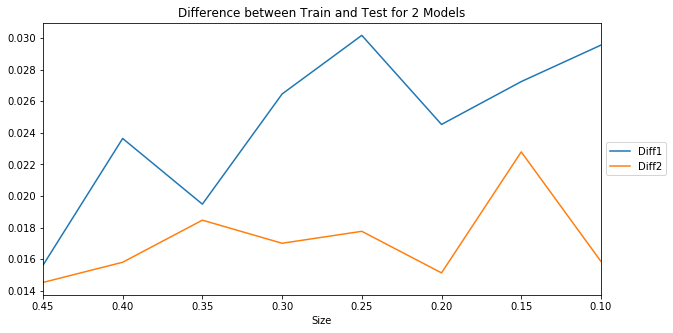

In [1195]:
df.plot(x='Size', y=['Diff1','Diff2'],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Difference between Train and Test for 2 Models', color='black')

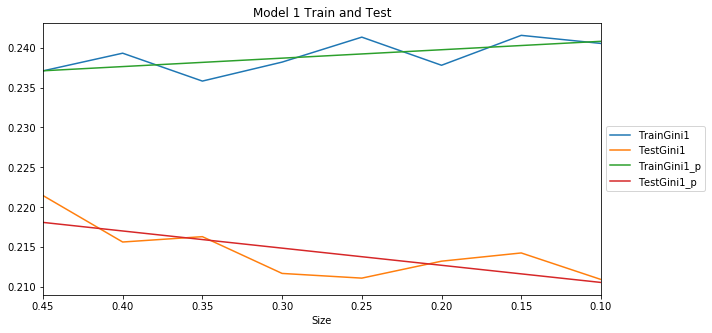

In [1196]:
df.plot(x='Size', y=['TrainGini1','TestGini1','TrainGini1_p','TestGini1_p'],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Model 1 Train and Test', color='black')

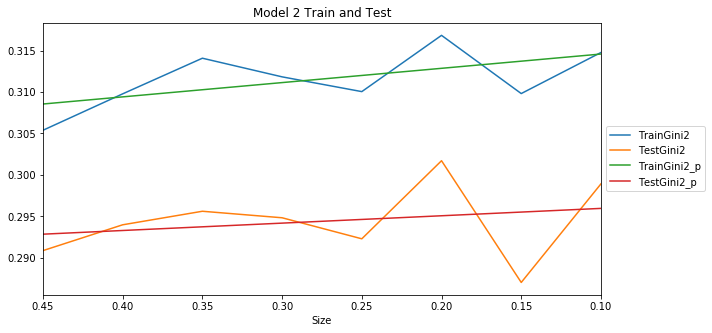

In [1197]:
df.plot(x='Size', y=['TrainGini2','TestGini2','TrainGini2_p','TestGini2_p'],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Model 2 Train and Test', color='black')

In [1198]:
#5.Table
print(df)

   Size  TestGini1  TrainGini1     Diff1  TestGini2  TrainGini2     Diff2  \
0  0.45   0.221477    0.237085  0.015608   0.290863    0.305384  0.014522   
1  0.40   0.215657    0.239300  0.023643   0.293979    0.309780  0.015801   
2  0.35   0.216327    0.235808  0.019481   0.295613    0.314080  0.018467   
3  0.30   0.211724    0.238184  0.026460   0.294827    0.311831  0.017004   
4  0.25   0.211135    0.241310  0.030175   0.292289    0.310049  0.017761   
5  0.20   0.213257    0.237789  0.024532   0.301710    0.316838  0.015128   
6  0.15   0.214288    0.241534  0.027246   0.287023    0.309815  0.022792   
7  0.10   0.210966    0.240523  0.029557   0.298916    0.314770  0.015854   

   TestGini1_p  TrainGini1_p  TestGini2_p  TrainGini2_p  
0     0.218113      0.237096     0.292846      0.308553  
1     0.217039      0.237623     0.293291      0.309415  
2     0.215965      0.238151     0.293736      0.310276  
3     0.214891      0.238678     0.294180      0.311138  
4     0.213817  